    A neural network is a network where given some inputs, it finds the output between some specific outputs based on the weights of the inputs. 

    First try :    
    Every input has a weight on the output. 
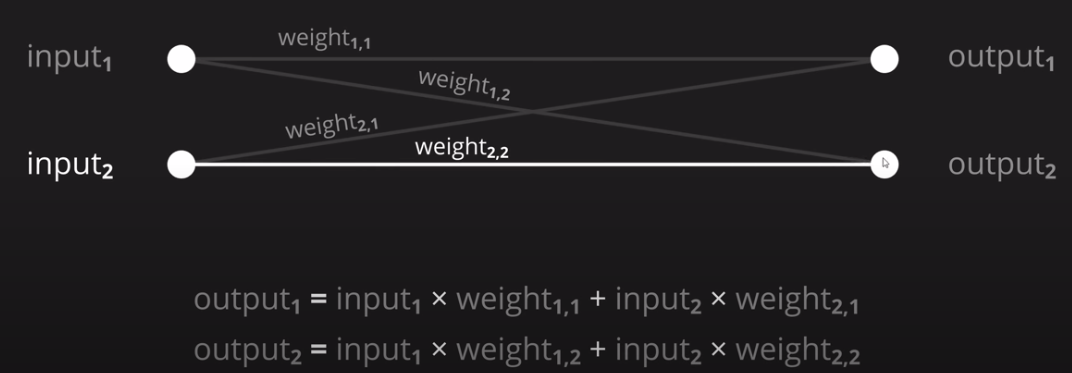

In [2]:
weight_1_1 = 1
weight_1_2 = 1
weight_2_1 = 1
weight_2_2 = 1

def classify(input_1 : float, input_2 : float) -> int: 
    output_1 = input_1 * weight_1_1 + input_2 * weight_1_2
    output_2 = input_1 * weight_1_2 + input_2 * weight_2_2

    return max(output_1, output_2)

    Second try: 
    Weights are not enough by themselves. We need something to shift the multiplication of inputs and weights. This shift is called bias.

In [ ]:
weight_1_1 = 0.3
weight_1_2 = 0.6
weight_2_1 = 0.4
weight_2_2 = 0.7

bias_1 = 0.2
bias_2 = 0.35

def classify(input_1 : float, input_2 : float) -> int: 
    output_1 = input_1 * weight_1_1 + input_2 * weight_1_2 + bias_1
    output_2 = input_1 * weight_1_2 + input_2 * weight_2_2 + bias_2

    return max(output_1, output_2)

    Third try: 
    To have a more advanced and efficient network, we need to increase the size of it. It is not sensible to increase the input and output size. But, we can add hidden nodes between inputs and outputs. 
    Inputs are called input layer. Outputs are called output layer. The hidden nodes between them are called hidden layers. 
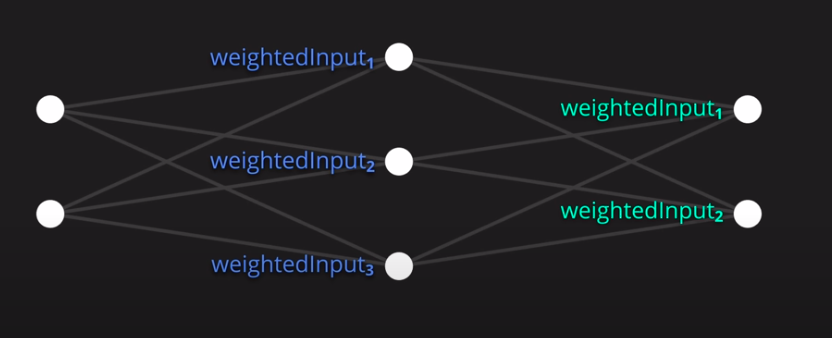

In [ ]:
#Object-oriented design 
import numpy as np

class Node: 
    def __init__(self, weights, bias) -> None:
        self.bias = bias
        # Weights for a node is the weights of all edges that are coming to this node. 
        self.weights = weights
    
    def calculate_output(self, inputs): 
        self.inputs = inputs
        self.output = self.calculate_total_input()
        return self.output

    def calculate_total_input(self): 
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias
    
class Layer: 
    def __init__(self, num_nodes_in : int, num_nodes : int) -> None:
        # num_nodes_in is the number of the nodes of the previous layer(all of these 
        # nodes will be coming in to the nodes of this layer)
        self.num_nodes = num_nodes
        self.nodes = []
        for i in range(self.num_nodes): 
            weights = np.random.rand(num_nodes_in)
            bias = np.random.random()
            self.nodes.append(Node(weights, bias))

    def calculate_outputs(self, inputs): 
        outputs = np.zeros(self.num_nodes)
        for node_index in range(self.num_nodes):
            node : Node = self.nodes[node_index]
            outputs[node_index] = node.calculate_output(inputs)
        return outputs


class NeuralNetwork: 
    def __init__(self, layer_sizes) -> None:
        self.layers = []
        # first layer size is the size of the input layer. We don't need an input layer in our 
        # network so we don't create it. 
        for i in range(1, len(layer_sizes)): 
            self.layers.append(Layer(layer_sizes[i - 1], layer_sizes[i]))
    
    def calculate_outputs(self, inputs): 
        for layer_index in range(len(self.layers)): 
            layer : Layer = self.layers[layer_index]
            inputs = layer.calculate_outputs(inputs)
        return inputs
    
    def classify(self, inputs : list(float)): 
        outputs : list(float) = self.calculate_outputs(inputs)
        return max(outputs)

    Fourth try: 
    A node in neural network should behave just like neurons, it should have a threshold to have a positive output. Activation function is useful for that purpose. Activation function is a function which gives positive value if it is bigger than zero and zero(or close to zero) if it is smaller than zero. ReLU and sigmoid functions are the most popular activation functions. 

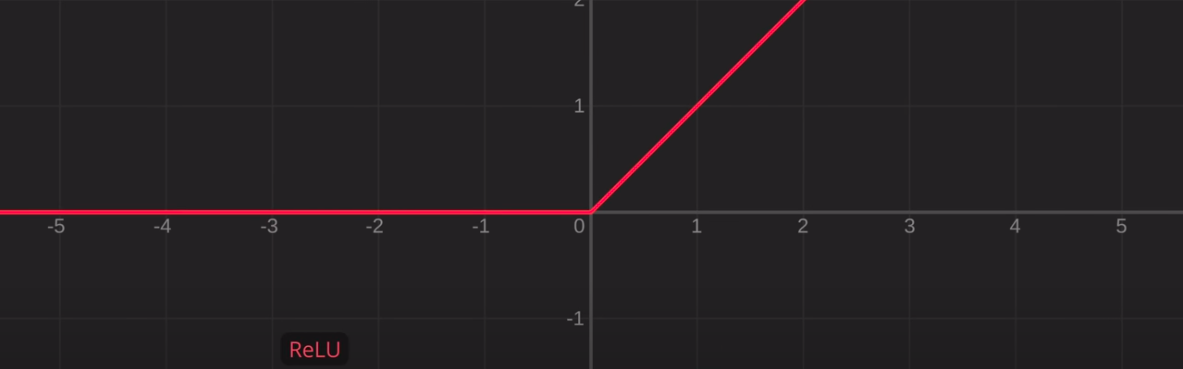

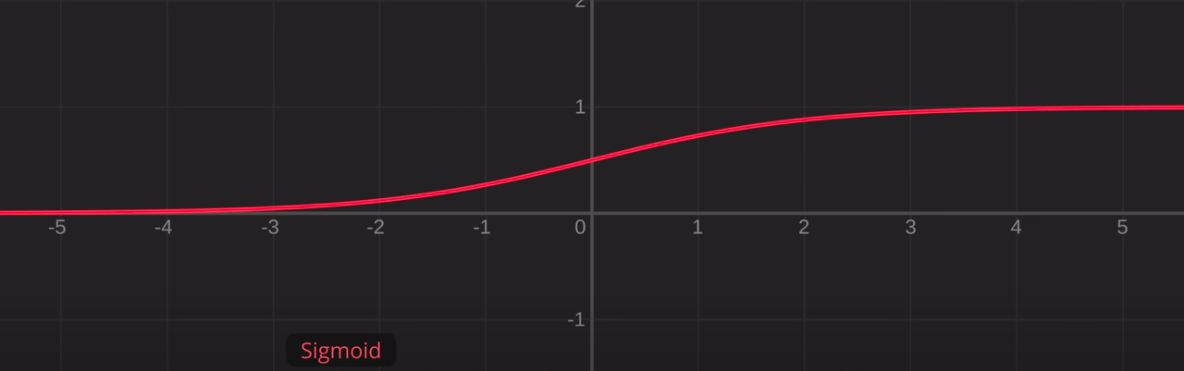

In [ ]:
import math
import numpy as np
import random
from typing import List

class Node: 
    def __init__(self, weights, bias) -> None:
        self.bias = bias
        # Weights for a node is the weights of all edges that are coming to this node. 
        self.weights = weights
    
    def calculate_output(self, inputs): 
        self.inputs = inputs
        self.total_input = self.calculate_total_input()
        self.output = self.output_function(self.total_input)
        return self.output
    
    def calculate_total_input(self): 
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    def output_function(self, total_input): 
        """
        Output function is an activation function(sigmoid). 
        Activation function like this helps the neural network to change smoothly based on the
        weights and biases. 
        """
        return 1 / (1 + np.exp(-total_input)) 

        

class Layer: 
    def __init__(self, num_nodes_in : int, num_nodes : int) -> None:
        # num_nodes_in is the number of the nodes of the previous layer(all of these 
        # nodes will be coming in to the nodes of this layer)
        self.num_nodes = num_nodes
        self.nodes = []
        for i in range(self.num_nodes): 
            weights = np.random.rand(num_nodes_in)
            bias = np.random.random()
            self.nodes.append(Node(weights, bias))

    def calculate_outputs(self, inputs): 
        outputs = np.zeros(self.num_nodes)
        for node_index in range(self.num_nodes):
            node : Node = self.nodes[node_index]
            outputs[node_index] = node.calculate_output(inputs)
        return outputs

class NeuralNetwork: 
    def __init__(self, layer_sizes) -> None:
        self.layers = []
        # first layer size is the size of the input layer. We don't need an input layer in our 
        # network so we don't create it. 
        for i in range(1, len(layer_sizes)): 
            self.layers.append(Layer(layer_sizes[i - 1], layer_sizes[i]))
    
    def calculate_outputs(self, inputs): 
        for layer_index in range(len(self.layers)): 
            layer : Layer = self.layers[layer_index]
            inputs = layer.calculate_outputs(inputs)
        return inputs
    
    def classify(self, inputs : list(float)): 
        outputs : list(float) = self.calculate_outputs(inputs)
        return max(outputs)

    Fifth try: 
    A cost(or loss) function is required for a neural network. Cost is the value that indicates how far the neural network is from its correct state. Most of the time the cost for a node is the square of the difference between the current output and expected output. Total loss of a network is the sum of the loss of the nodes of output layer. 

In [ ]:
import math
import numpy as np
import random
from typing import List

class DataPoint: 
    """
    A data point is a class where input and the expected outputs of that input is kept.  
    """
    def __init__(self, inputs : list(float), expected_outputs : list(float)) -> None:
        self.inputs = inputs
        self.expected_outputs = expected_outputs

class Node: 
    def __init__(self, weights, bias) -> None:
        self.bias = bias
        # Weights for a node is the weights of all edges that are coming to this node. 
        self.weights = weights
    
    def calculate_output(self, inputs): 
        self.inputs = inputs
        self.total_input = self.calculate_total_input()
        self.output = self.output_function(self.total_input)
        return self.output
    
    def calculate_total_input(self): 
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    def output_function(self, total_input): 
        return 1 / (1 + np.exp(-total_input))
    
    def loss(self, expected_output): 
        """
        Dividing by 2 will be useful in future.  
        """
        return 1/2 * (expected_output - self.output) ** 2
        

class Layer: 
    def __init__(self, num_nodes_in : int, num_nodes : int) -> None:
        # num_nodes_in is the number of the nodes of the previous layer(all of these 
        # nodes will be coming in to the nodes of this layer)
        self.num_nodes = num_nodes
        self.nodes = []
        for i in range(self.num_nodes): 
            weights = np.random.rand(num_nodes_in)
            bias = np.random.random()
            self.nodes.append(Node(weights, bias))

    def calculate_outputs(self, inputs): 
        outputs = np.zeros(self.num_nodes)
        for node_index in range(self.num_nodes):
            node : Node = self.nodes[node_index]
            outputs[node_index] = node.calculate_output(inputs)
        return outputs


class NeuralNetwork: 
    def __init__(self, layer_sizes) -> None:
        self.layers = []
        # first layer size is the size of the input layer. We don't need an input layer in our 
        # network so we don't create it. 
        for i in range(1, len(layer_sizes)): 
            self.layers.append(Layer(layer_sizes[i - 1], layer_sizes[i]))
    
    def calculate_outputs(self, inputs): 
        for layer_index in range(len(self.layers)): 
            layer : Layer = self.layers[layer_index]
            inputs = layer.calculate_outputs(inputs)
        return inputs
    
    def calculate_accuracy(self, data_points : List[DataPoint]): 
        accuracy = 0
        for i in range(len(data_points)):
            data_point : DataPoint = data_points[i] 
            output = np.argmax(self.calculate_outputs(data_point.inputs))
            expected = np.argmax(data_point.expected_outputs)
            if output == expected: accuracy += 1
        return accuracy / len(data_points)
    
    def calculate_total_loss(self, data_points : List[DataPoint]): 
        """
        Total loss is the loss values of the nodes of the output layer. 
        This function calculates the average total loss of different data points.  
        """
        total_loss = 0
        for data_point in data_points: 
            self.calculate_outputs(data_point.inputs)
            output_layer : Layer = self.layers[len(self.layers) - 1]
            loss = 0
            for node_index in range(output_layer.num_nodes): 
                node : Node = output_layer.nodes[node_index]
                loss += node.loss(data_point.expected_outputs[node_index])
            total_loss += loss / len(data_points)
        return total_loss

    Sixth try: 
    Now our purpose is to minimize the loss of the neural network given some data points. To minimize the total loss of the neural network, we can find how each weight and bias effects the total loss of the network and we can change them in the way that minimizes the total loss. 
    The slope value for a function at some point tells us whether the output of the function is increasing or decreasing at the current value input, so subtracting the slope value from the input value should cause the output of the function to decrease. So what we need to do is find the slope of loss function for each weights and biases at their current values and using these slopes we can minimize the loss. 
    The learn rate allows us to control how much the inputs(weights and biases) should change with each iteration. 
    
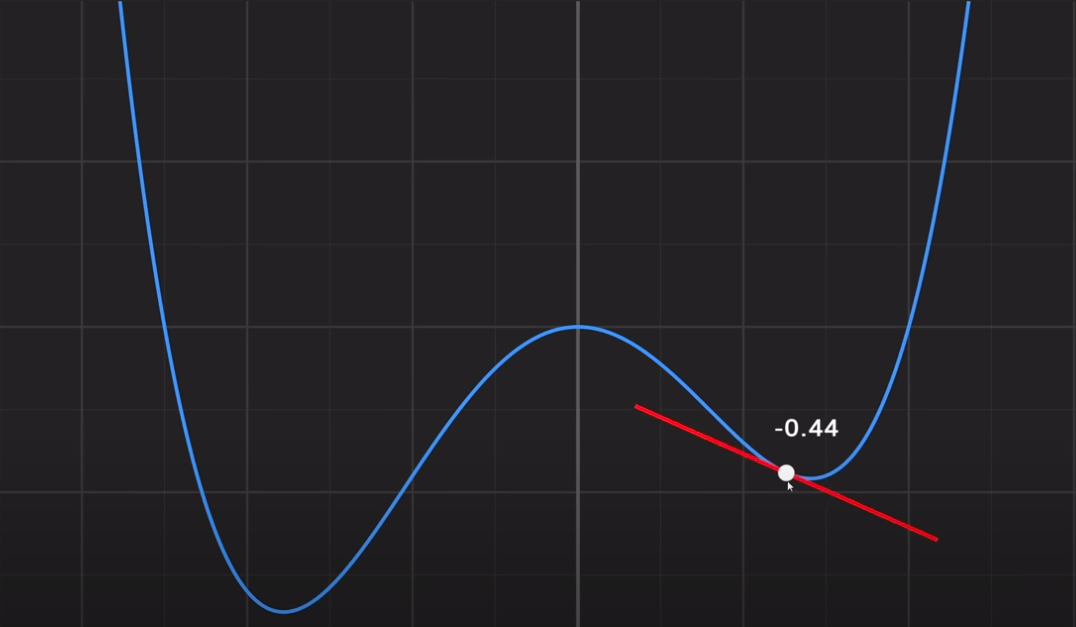
    
    Our purpose is finding the global or local minimum for the loss function. 

In [ ]:
import math
import numpy as np

# An example of finding how one variable effects the output of a function 
# and minimizing the output of that function. 
def Func(x): 
    return 0.2 * math.pow(x, 4) + 0.1 * math.pow(x, 3) - math.pow(x, 2) + 2

def learn(input_value: float, learn_rate : float): 
    h = 0.00001
    delta_output = Func(input_value + h) - Func(input_value)
    slope = delta_output / h
    # Decrease the input value in the decreasing slope way to minimize function output
    # Slope value tells us whether the output is increasing or decreasing at the current input value
    input_value -= slope * learn_rate

    Seventh try: 
    If a function is multivariable function, then the slope of the function for each variable is called gradient vector. 
    A more mathematical approach: Use partial derivatives to find gradients of weights and biases. 

In [ ]:
import math
import numpy as np

# Previous example modified with derivatives. 
def Func(x): 
    return 0.2 * math.pow(x, 4) + 0.1 * math.pow(x, 3) - math.pow(x, 2) + 2

def FuncDeriv(x): 
    """
    Derivative of Func above wrt to x. 
    """
    return 0.2 * 4 * math.pow(x, 3) + 0.1 * 3 * math.pow(x, 2) - 2 * x

def learn(input_value: float, learn_rate : float): 
    slope = FuncDeriv(input_value)
    input_value -= slope * learn_rate

    Now we need to apply this approach to our neural network. We need to find gradient vector for each node in the neural network and apply this gradient. 
    The gradient for a node is the partial derivative of loss wrt to total input for that node. We can use this gradient value to find gradients for the weights and bias for that node. 
    Calculating gradients for output layer is easy. We can directly calculate partial derivative of loss wrt to total input for the nodes in output layer. But calculating gradients for hidden layers are harder and they require the gradients of the next layers to calculate theirs.
    
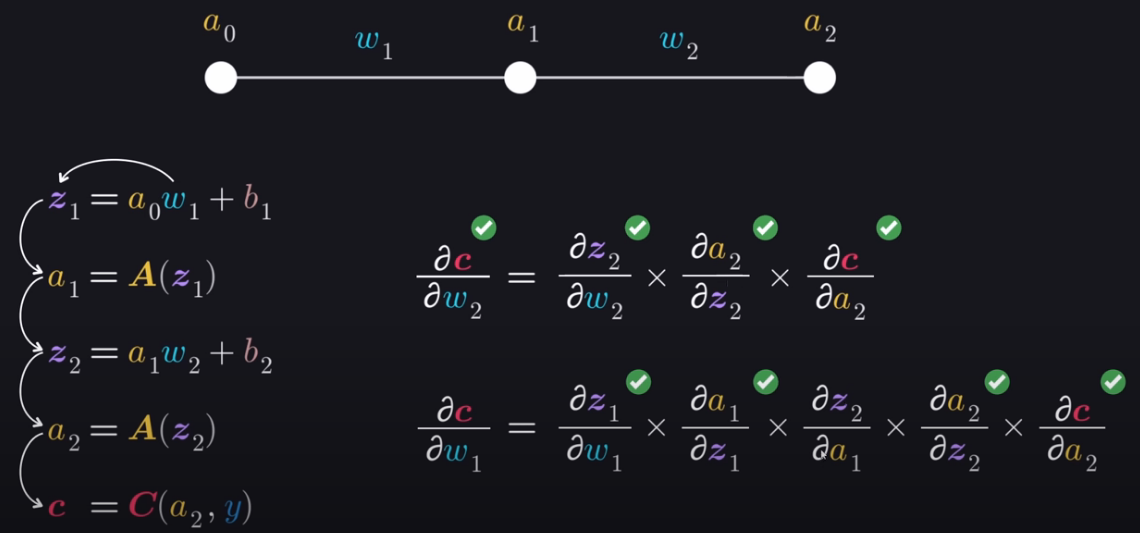

    A gradient for a node in the hidden layer can be calculated in this way: 
        (partial derivative of loss wrt to total input) = (partial derivative of loss wrt output) * (partial derivative of output wrt total input) 
        (partial derivative of loss wrt output) = sum of (partial derivatives of loss wrt the weight(weight which comes from this node)) for every node in the next layer

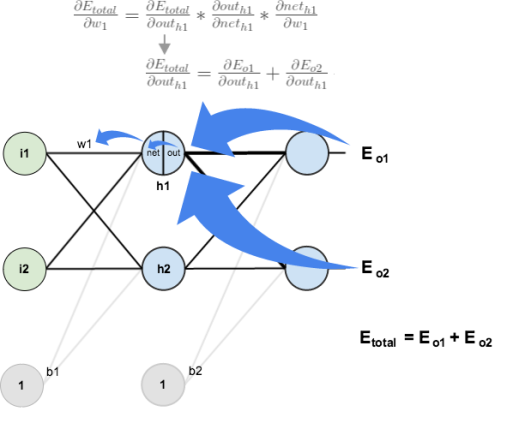

    Since this is more like an advanced stuff, you can learn more about it using these links: 
http://colah.github.io/posts/2015-08-Backprop/
    
https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [1]:
import math
import numpy as np
import random
from typing import List

class DataPoint: 
    def __init__(self, inputs, expected_outputs) -> None:
        self.inputs = inputs
        self.expected_outputs = expected_outputs

class Node: 
    def __init__(self, weights, bias) -> None:
        self.bias = bias
        # Weights for a node is the weights of all edges that are coming to this node. 
        self.weights = weights
    
    def calculate_output(self, inputs): 
        self.inputs = inputs
        self.total_input = self.calculate_total_input()
        self.output = self.output_function(self.total_input)
        return self.output
    
    def calculate_total_input(self): 
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    def output_function(self, total_input): 
        return 1 / (1 + np.exp(-total_input))
    
    def loss(self, expected_output): 
        return 1/2 * (expected_output - self.output) ** 2
    
    def output_pd_total_input(self): 
        """
        Partial derivative of output wrt total input
        """
        return self.output * (1 - self.output)
    
    def loss_pd_output(self, expected_output): 
        """
        Partial derivative of node loss wrt output
        """
        return -(expected_output - self.output)
    
    def loss_pd_total_input(self, expected_output : float):
        """
        Partial derivative of node loss wrt total input. 
        d(node_loss) / d(total_input) = d(node_loss) / d(output) * d(output) / d(total_input)
        """
        return self.loss_pd_output(expected_output) * self.output_pd_total_input()
    
    def total_input_pd_weight(self, index):
        """
        total_input[index] = weights[index] * inputs[index]
        d(total_input(index)) / d(weights[index]) = inputs[index]
        """
        return self.inputs[index] 
    
    def apply_gradient(self, gradient, learn_rate): 
        """
        Apply gradients function tries to minimize the loss of a node by 
        applying the gradient vector to the weights and bias.
        Gradient is the partial derivative of the loss wrt the total input for this node.  
        """
        loss_pd_total_input = gradient
        for weight_index in range(len(self.weights)): 
            loss_pd_weight = loss_pd_total_input * self.total_input_pd_weight(weight_index)
            self.weights[weight_index] -= learn_rate * loss_pd_weight
        # total_input = weights * inputs + bias -> d(total_input) / d(bias) = 1 
        loss_pd_bias = loss_pd_total_input * 1
        self.bias -= learn_rate * loss_pd_bias

        

class Layer: 
    def __init__(self, num_nodes_in : int, num_nodes : int) -> None:
        # num_nodes_in is the number of the nodes of the previous layer(all of these 
        # nodes will be coming into the nodes of this layer)
        self.num_nodes = num_nodes
        self.nodes = []
        for i in range(self.num_nodes): 
            weights = np.random.rand(num_nodes_in)
            bias = np.random.random()
            self.nodes.append(Node(weights, bias))

    def calculate_outputs(self, inputs): 
        outputs = np.zeros(self.num_nodes)
        for node_index in range(self.num_nodes):
            node : Node = self.nodes[node_index]
            outputs[node_index] = node.calculate_output(inputs)
        return outputs
    
    def apply_gradients(self, gradients, learn_rate): 
        """
        Applies the apply_gradient function to all its nodes. 
        Gradients is an array of loss_pd_total_inputs for each node in the layer. 
        """
        for node_index in range(self.num_nodes): 
            node : Node = self.nodes[node_index]
            node.apply_gradient(gradients[node_index], learn_rate)


class NeuralNetwork: 
    def __init__(self, layer_sizes) -> None:
        self.layers = []
        # first layer size is the size of the input layer. We don't need an input layer in our 
        # network so we don't create it. 
        for i in range(1, len(layer_sizes)): 
            self.layers.append(Layer(layer_sizes[i - 1], layer_sizes[i]))
    
    def calculate_outputs(self, inputs): 
        for layer_index in range(len(self.layers)): 
            layer : Layer = self.layers[layer_index]
            inputs = layer.calculate_outputs(inputs)
        return inputs
    
    def calculate_accuracy(self, data_points : List[DataPoint]): 
        accuracy = 0
        for i in range(len(data_points)):
            data_point : DataPoint = data_points[i] 
            output = np.argmax(self.calculate_outputs(data_point.inputs))
            expected = np.argmax(data_point.expected_outputs)
            if output == expected: accuracy += 1
        return accuracy / len(data_points)
    
    def calculate_total_loss(self, data_points : List[DataPoint]): 
        total_loss = 0
        for data_point in data_points: 
            self.calculate_outputs(data_point.inputs)
            output_layer : Layer = self.layers[len(self.layers) - 1]
            loss = 0
            for node_index in range(output_layer.num_nodes): 
                node : Node = output_layer.nodes[node_index]
                loss += node.loss(data_point.expected_outputs[node_index])
            total_loss += loss / len(data_points)
        return total_loss
    
    def calculate_all_gradients(self, expected_outputs): 
        """
            The gradient we want to calculate for a node is the partial derivative of 
            loss of the node wrt total inputs of the node. We can then use this value to 
            find partial derivative of loss wrt to the weights and bias and minimize the loss
            by changing the weights and bias. 
        """
        gradients = [[]] * len(self.layers) 
        
        # First calculate gradients of the output layer. 
        output_layer : Layer = self.layers[-1]
        loss_pd_total_input_array = [0] * output_layer.num_nodes
        for node_index in range(output_layer.num_nodes): 
            node : Node = output_layer.nodes[node_index]
            loss_pd_total_input_array[node_index] = node.loss_pd_total_input(expected_outputs[node_index])
        gradients[-1] = loss_pd_total_input_array

        # Then calculate gradients of the hidden layers using the gradients of next layer(backpropagation). 
        for layer_index in range(len(self.layers) - 2, -1, -1): 
            layer : Layer = self.layers[layer_index]
            loss_pd_total_input_array = [0] * layer.num_nodes
            for node_index in range(layer.num_nodes): 
                node : Node = layer.nodes[node_index]
                loss_pd_output = 0
                next_layer : Layer = self.layers[layer_index + 1]
                for node_to_go in range(next_layer.num_nodes): 
                    loss_pd_output += gradients[layer_index + 1][node_to_go] \
                                            * next_layer.nodes[node_to_go].weights[node_index]
                loss_pd_total_input_array[node_index] = loss_pd_output * node.output_pd_total_input()
            gradients[layer_index] = loss_pd_total_input_array
        return gradients
    
    def apply_all_gradients(self, gradients, learn_rate): 
        for layer_index in range(len(self.layers)):
            layer : Layer = self.layers[layer_index] 
            layer.apply_gradients(gradients[layer_index], learn_rate)
    
    def learn(self, training_data : DataPoint, learn_rate : float): 
        self.calculate_outputs(training_data.inputs)
        gradients = self.calculate_all_gradients(training_data.expected_outputs)
        self.apply_all_gradients(gradients, learn_rate)

    Eight try: 
    Add mini-batch training to neural network. 

In [ ]:
import math
import numpy as np
import random
from typing import List

class DataPoint: 
    def __init__(self, inputs, expected_outputs) -> None:
        self.inputs = inputs
        self.expected_outputs = expected_outputs

class Node: 
    def __init__(self, weights, bias) -> None:
        self.bias = bias
        # Weights for a node is the weights of all edges that are coming to this node. 
        self.weights = weights
    
    def calculate_output(self, inputs): 
        self.inputs = inputs
        self.total_input = self.calculate_total_input()
        self.output = self.output_function(self.total_input)
        return self.output
    
    def calculate_total_input(self): 
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    def output_function(self, total_input): 
        return 1 / (1 + np.exp(-total_input))
    
    def loss(self, expected_output): 
        return 1/2 * (expected_output - self.output) ** 2
    
    def output_pd_total_input(self): 
        return self.output * (1 - self.output)
    
    def loss_pd_output(self, expected_output): 
        return -(expected_output - self.output)
    
    def loss_pd_total_input(self, expected_output : float):
        return self.loss_pd_output(expected_output) * self.output_pd_total_input()
    
    def total_input_pd_weight(self, index):
        return self.inputs[index] 
    
    def apply_gradient(self, gradient, learn_rate): 
        loss_pd_total_input = gradient
        for weight_index in range(len(self.weights)): 
            loss_pd_weight = loss_pd_total_input * self.total_input_pd_weight(weight_index)
            self.weights[weight_index] -= learn_rate * loss_pd_weight
        # total_input = weights * inputs + bias -> d(total_input) / d(bias) = 1 
        loss_pd_bias = loss_pd_total_input * 1
        self.bias -= learn_rate * loss_pd_bias
        

class Layer: 
    def __init__(self, num_nodes_in : int, num_nodes : int) -> None:
        # num_nodes_in is the number of the nodes of the previous layer(all of these 
        # nodes will be coming in to the nodes of this layer)
        self.num_nodes = num_nodes
        self.nodes = []
        for i in range(self.num_nodes): 
            weights = np.random.rand(num_nodes_in)
            bias = np.random.random()
            self.nodes.append(Node(weights, bias))

    def calculate_outputs(self, inputs): 
        outputs = np.zeros(self.num_nodes)
        for node_index in range(self.num_nodes):
            node : Node = self.nodes[node_index]
            outputs[node_index] = node.calculate_output(inputs)
        return outputs
    
    def get_outputs(self): 
        outputs = np.zeros(self.num_nodes)
        for node_index in range(self.num_nodes): 
            node : Node = self.nodes[node_index]
            outputs[node_index] = node.output
        return outputs
    
    def apply_gradients(self, gradients, learn_rate): 
        for node_index in range(self.num_nodes): 
            node : Node = self.nodes[node_index]
            node.apply_gradient(gradients[node_index], learn_rate)


class NeuralNetwork: 
    def __init__(self, layer_sizes) -> None:
        self.layers = []
        # first layer size is the size of the input layer. We don't need an input layer in our 
        # network so we don't create it. 
        for i in range(1, len(layer_sizes)): 
            self.layers.append(Layer(layer_sizes[i - 1], layer_sizes[i]))
    
    def calculate_outputs(self, inputs): 
        for layer_index in range(len(self.layers)): 
            layer : Layer = self.layers[layer_index]
            inputs = layer.calculate_outputs(inputs)
        return inputs
    
    def calculate_accuracy(self, data_points : List[DataPoint]): 
        accuracy = 0
        for i in range(len(data_points)):
            data_point : DataPoint = data_points[i] 
            output = np.argmax(self.calculate_outputs(data_point.inputs))
            expected = np.argmax(data_point.expected_outputs)
            if output == expected: accuracy += 1
        return accuracy / len(data_points)
    
    def calculate_total_loss(self, data_points : List[DataPoint]): 
        total_loss = 0
        for data_point in data_points: 
            self.calculate_outputs(data_point.inputs)
            output_layer : Layer = self.layers[len(self.layers) - 1]
            loss = 0
            for node_index in range(output_layer.num_nodes): 
                node : Node = output_layer.nodes[node_index]
                loss += node.loss(data_point.expected_outputs[node_index])
            total_loss += loss / len(data_points)
        return total_loss
    
    def calculate_all_gradients(self, expected_outputs): 
        gradients = [[]] * len(self.layers) 
        
        # First calculate gradients of the output layer. 
        output_layer : Layer = self.layers[-1]
        loss_pd_total_input_array = [0] * output_layer.num_nodes
        for node_index in range(output_layer.num_nodes): 
            node : Node = output_layer.nodes[node_index]
            loss_pd_total_input_array[node_index] = node.loss_pd_total_input(expected_outputs[node_index])
        gradients[-1] = loss_pd_total_input_array

        # Then calculate gradients of the hidden layers using the gradients of next layer. 
        for layer_index in range(len(self.layers) - 2, -1, -1): 
            layer : Layer = self.layers[layer_index]
            loss_pd_total_input_array = [0] * layer.num_nodes
            for node_index in range(layer.num_nodes): 
                node : Node = layer.nodes[node_index]
                loss_pd_output_sums = 0
                next_layer : Layer = self.layers[layer_index + 1]
                for o in range(next_layer.num_nodes): 
                    loss_pd_output_sums += gradients[layer_index + 1][o] \
                                            * next_layer.nodes[o].weights[node_index]
                loss_pd_total_input_array[node_index] = loss_pd_output_sums * node.output_pd_total_input()
            gradients[layer_index] = loss_pd_total_input_array
        return gradients
    
    def apply_all_gradients(self, gradients, learn_rate): 
        for layer_index in range(len(self.layers)):
            layer : Layer = self.layers[layer_index] 
            layer.apply_gradients(gradients[layer_index], learn_rate)
    
    def learn(self, training_data : DataPoint, learn_rate : float): 
        self.calculate_outputs(training_data.inputs)
        gradients = self.calculate_all_gradients(training_data.expected_outputs)
        self.apply_all_gradients(gradients, learn_rate)

    def train(self, training_datas : List[DataPoint], epochs, mini_batch_size):
        learn_rate = 0.1
        for i in range(epochs): 
            random.shuffle(training_datas)
            mini_batches = [
                training_datas[k:k+mini_batch_size]
                for k in range(i * 10000, (i + 1) * 10000, mini_batch_size)
            ]
            for mini_batch_data in mini_batches:
                gradients = [np.zeros(layer.num_nodes) for layer in self.layers]
                for training_data in mini_batch_data: 
                    self.calculate_outputs(training_data.inputs)
                    new_gradients = self.calculate_all_gradients(training_data.expected_outputs)
                    gradients = [grad + dgrad for grad, dgrad in zip(gradients, new_gradients)]
                gradients = [grad / len(mini_batch_data) for grad in gradients]
                self.apply_all_gradients(gradients, learn_rate)

                start_ind = np.random.randint(0, m - 100)
                total_loss = neural_network.calculate_total_loss(training_datas[start_ind:start_ind + 100])
                print(f"Total loss : {total_loss}")
                # accuracy = neural_network.calculate_accuracy(training_datas[start_ind:start_ind + 100])
                # print(f"Current accuracy : {accuracy}")


    Testing the final neural network

    We require a function which converts the given output index to output layer. It should only make output index 1 and every other index to 0. This function is also known as one-hot zero function. 

In [3]:
def create_output_layer(output, output_layer_size): 
    """
    Creates the output layer as an array from the given output layer size and the index of 
    the output.  
    """
    vec = np.zeros(output_layer_size)
    vec[output] = 1.0
    return vec

    Test 1: 

In [ ]:
layer_sizes = [2, 2, 2]
nn = NeuralNetwork(layer_sizes)
learn_rate = 0.5
training_datas = [DataPoint([0.05, 0.1], [0.01, 0.99])]
nn.train(training_datas, 4, 50)

    Test 2: 

In [ ]:
training_sets = [
    [[0, 0], [0]],
    [[0, 1], [1]],
    [[1, 0], [1]],
    [[1, 1], [0]]
]
for i in range(len(training_sets)): 
    training_sets[i] = DataPoint(training_sets[i][0], training_sets[i][1])

layer_sizes = [2, 5, 1]
nn = NeuralNetwork(layer_sizes)
nn.train(training_sets, 4, 50)

    Test 3: Create a character idenifier using Mnist dataset. 

In [ ]:
import pandas as pd
data = pd.read_csv('./train.csv')
data = np.array(data)
m, n = data.shape

input_layer_size = 784
output_layer_size = 10
layer_sizes = [input_layer_size, 16, 16, output_layer_size]
neural_network = NeuralNetwork(layer_sizes)

training_datas = []
for i in range(m): 
    training_input = data[i][1:n]
    training_input = training_input / 255.
    training_output = data[i][0]
    training_output = create_output_layer(training_output, output_layer_size)
    training_datas.append(DataPoint(training_input, training_output))

neural_network.train(training_datas, 4, 50)

    References: 

https://www.youtube.com/watch?v=hfMk-kjRv4c&t=1s&ab_channel=SebastianLague

https://github.com/mattm/simple-neural-network

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi